<a href="https://colab.research.google.com/github/Viny2030/UNED/blob/main/input19_LSI_Ejemplo_Basico_Topic_Modeling_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 19 - Latent Semantic Index/Analysis (LSI/A)


* El LSI es una técnica de factorización matricial aplicable al campo del NLP, que tiene como objetivo analizar las relaciones entre los documentos de un corpus y las palabras.


* El LSI asume que las palabras que tienen un significado similar, aparecerán en partes de documentos similares.


* El LSI tiene como finalidad extraer una serie de factores latentes que caractericen a los documentos y las palabras del corpus.


* Para ello necesita una matriz de frecuencias que represente el número de veces que aparecen las palabras en los documentos:

    - ***Filas***: Cada fila representa a una palabra.
    - ***Columnas***: Cada columna representa a un documento..
    - ***Celda***: Cada celda representa el número de veces que aparece la palabra en el documento.
    
    
* El LSI descompone una matriz “A” (de frecuencias); que esta formada por el numero de apariciones de cada palabra en cada documento, en tres matrices “U”, “S” y “V” cuyo producto matricial es igual a la matriz original “A”:


$$ SVD(A) = U \cdot S \cdot V^{t}$$


* Donde cada una de estas matrices contiene la siguiente información:

    - ***Matriz “U”*** contiene los valores de los ***factores latentes de las palabras***.
    - ***Matriz “V”*** contiene los valores de los ***factores latentes de los documentos***.
    - ***Matriz “S”*** es una matriz en cuya diagonal están los llamados valores singulares que son decrecientes y no negativos. Esta matriz representa la ***importancia que tiene cada uno de los factores latentes de las palabras y de los documentos***.
    
    
<img src="./imgs/015_LSI_Matrix.png" style="width: 800px;"/>


* Como la matriz “S” nos informa de la importancia que tiene cada uno de los factores latentes, podemos coger solo los ***K-factores más importantes*** para caracterizar cada una de las palabras y de los items.


* De esta forma se trabaja con matrices más reducidas lo que nos permite comprimir la información de la matriz de apariciones.


* El SVD tiene una propiedad muy importante que viene dada por el ***teorema de Eckart-Young***, que afirma que la mejor aproximación a la matriz “A” la obtenemos poniendo a ceros los “K” valores singulares de menor a mayor valor; es decir, reduciendo la matriz “S”. Por tanto si multiplicásemos las submatrices “U<sub>k</sub>”, “S<sub>k</sub>” y “V<sub>k</sub>” obtendríamos una matriz A’ de rango K que mejor aproxima (de acuerdo con la norma de Frobenius) a la matriz “A”.


<img src="./imgs/016_LSI_Matrix_reduc.png" style="width: 800px;"/>



* El valor de K, va a representar el número de temas en que vamos a dividir (o Clusterizar) nuestro corpus, por lo tanto la selección del número de temas es un valor que tenemos que definir a priori.


* Para poder trabajar en la extracción de tópicos y ver las relaciones entre los documentos y las palabras, vamos trabajar con las matrices:

    - ***U<sub>k</sub>***: Estudiar las relaciones entre palabras
    - ***V<sub>k</sub>***: Estudiar las relaciones entre documentos
    - ***K***: Número de temas que tendrá a priori el Corpus
    

<hr>


# Ejemplo de LSI con Gensim


* Veamos a continuación un ejemplo sencillo sobre el siguiente Corpus del cual podemos ver que habla de 3 temas:
    - Fútbol
    - Política
    - Economía
    

In [21]:
import warnings
warnings.filterwarnings('ignore')

corpus1 = ["Jane bought me these books.",
"Jane bought a book for me.",
"She dropped a line to him. Thank you.",
"She sleeps",
"I sleep a lot",
"I was born in Madrid",
"the cat was chased by the dog",
"I was born in Madrid during 1995",
"Out of all this , something good will come",
"Susan left after the rehearsal. She did it well",
"She sleeps during the morning, but she sleeps."]

In [22]:
from pprint import pprint
from gensim import corpora
from collections import defaultdict

# Tokenizamos
documents = [word.split() for word in corpus1]

# Creamos el diccionario (vocabulario)
frequency = defaultdict(int)
for doc in documents:
    for token in doc:
        frequency[token] += 1

documents = [[token for token in doc] for doc in documents]
dictionary = corpora.Dictionary(documents)
print('Diccionario:')
pprint(dictionary.token2id)


# Creamos la Bolsa de Palabras
corpus1 = [dictionary.doc2bow(doc) for doc in documents]
print('\nBolsa de Palabras:')
pprint(corpus1)

Diccionario:
{',': 31,
 '1995': 29,
 'I': 17,
 'Jane': 0,
 'Madrid': 20,
 'Out': 32,
 'She': 9,
 'Susan': 40,
 'Thank': 10,
 'a': 5,
 'after': 41,
 'all': 33,
 'book': 6,
 'books.': 1,
 'born': 21,
 'bought': 2,
 'but': 47,
 'by': 24,
 'cat': 25,
 'chased': 26,
 'come': 34,
 'did': 42,
 'dog': 27,
 'dropped': 11,
 'during': 30,
 'for': 7,
 'good': 35,
 'him.': 12,
 'in': 22,
 'it': 43,
 'left': 44,
 'line': 13,
 'lot': 18,
 'me': 3,
 'me.': 8,
 'morning,': 48,
 'of': 36,
 'rehearsal.': 45,
 'she': 49,
 'sleep': 19,
 'sleeps': 16,
 'sleeps.': 50,
 'something': 37,
 'the': 28,
 'these': 4,
 'this': 38,
 'to': 14,
 'was': 23,
 'well': 46,
 'will': 39,
 'you.': 15}

Bolsa de Palabras:
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (2, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(5, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(9, 1), (16, 1)],
 [(5, 1), (17, 1), (18, 1), (19, 1)],
 [(17, 1), (20, 1), (21, 1), (22, 1), (23, 1)],
 [(23, 1), (24, 1), (25, 1), (26, 1),

In [1]:
import warnings
warnings.filterwarnings('ignore')

corpus = ["balon balon balon futbol futbol liga liga liga ronaldo ronaldo ronaldo ronaldo ronaldo messi",
          "futbol futbol futbol futbol futbol ronaldo ronaldo ronaldo ronaldo messi messi",
          "balon balon futbol futbol futbol futbol futbol futbol futbol messi messi messi messi messi",
          "politica politica politica politica pp pp pp pp pp pp rajoy rajoy rajoy rajoy rajoy",
          "politica politica politica politica pp pp pp psoe psoe psoe psoe zapatero zapatero zapatero rajoy",
          "politica politica politica politica psoe psoe psoe psoe psoe psoe zapatero zapatero zapatero zapatero zapatero ",
          "dinero fmi fmi fmi fmi fmi ue ue ue ue pib pib pib ibex ibex",
          "zapatero rajoy dinero dinero dinero dinero fmi fmi fmi fmi ue ue ue ue pib",
          "pp psoe zapatero rajoy dinero dinero dinero dinero fmi fmi fmi fmi ue ue ue ",
          "futbol politica pib",
          "futbol zapatero liga rajoy"]



## Creamos el Diccionario y la Matriz (Bolsa de Palabras)

In [2]:
from pprint import pprint
from gensim import corpora
from collections import defaultdict

# Tokenizamos
documents = [word.split() for word in corpus]

# Creamos el diccionario (vocabulario)
frequency = defaultdict(int)
for doc in documents:
    for token in doc:
        frequency[token] += 1

documents = [[token for token in doc] for doc in documents]
dictionary = corpora.Dictionary(documents)
print('Diccionario:')
pprint(dictionary.token2id)


# Creamos la Bolsa de Palabras
corpus = [dictionary.doc2bow(doc) for doc in documents]
print('\nBolsa de Palabras:')
pprint(corpus)

Diccionario:
{'balon': 0,
 'dinero': 10,
 'fmi': 11,
 'futbol': 1,
 'ibex': 12,
 'liga': 2,
 'messi': 3,
 'pib': 13,
 'politica': 5,
 'pp': 6,
 'psoe': 8,
 'rajoy': 7,
 'ronaldo': 4,
 'ue': 14,
 'zapatero': 9}

Bolsa de Palabras:
[[(0, 3), (1, 2), (2, 3), (3, 1), (4, 5)],
 [(1, 5), (3, 2), (4, 4)],
 [(0, 2), (1, 7), (3, 5)],
 [(5, 4), (6, 6), (7, 5)],
 [(5, 4), (6, 3), (7, 1), (8, 4), (9, 3)],
 [(5, 4), (8, 6), (9, 5)],
 [(10, 1), (11, 5), (12, 2), (13, 3), (14, 4)],
 [(7, 1), (9, 1), (10, 4), (11, 4), (13, 1), (14, 4)],
 [(6, 1), (7, 1), (8, 1), (9, 1), (10, 4), (11, 4), (14, 3)],
 [(1, 1), (5, 1), (13, 1)],
 [(1, 1), (2, 1), (7, 1), (9, 1)]]


## Creamos el Modelo:

* Gensim tiene implementado el LSI en la clase ***LsiModel***: https://radimrehurek.com/gensim/models/lsimodel.html


* Como parámetros relevantes necesita:
    1. Corpus
    2. Número de Topics
    3. Diccionario o Vocabulario del Corpus

In [3]:
from gensim.models import LsiModel

lsi_model = LsiModel(corpus=corpus, num_topics=3, id2word=dictionary)

In [25]:
from gensim.models import LsiModel

lsi_model1 = LsiModel(corpus=corpus1, num_topics=3, id2word=dictionary)

### Matriz U


* En esta matriz obtenemos los ***factores latentes de cada una de las palabras del corpus***

In [27]:
u_matrix1 = lsi_model1.projection.u
u_matrix1

array([[ 1.30842972e-02,  6.12453535e-03, -2.30099708e-01],
       [ 2.40294412e-03,  1.51930150e-03, -7.60873345e-02],
       [ 1.30842972e-02,  6.12453535e-03, -2.30099708e-01],
       [ 2.40294412e-03,  1.51930150e-03, -7.60873345e-02],
       [ 2.40294412e-03,  1.51930150e-03, -7.60873345e-02],
       [ 9.01537104e-02,  2.48797250e-02, -4.71314415e-01],
       [ 1.06813531e-02,  4.60523385e-03, -1.54012374e-01],
       [ 1.06813531e-02,  4.60523385e-03, -1.54012374e-01],
       [ 1.06813531e-02,  4.60523385e-03, -1.54012374e-01],
       [ 3.51712217e-01,  2.86137649e-01, -2.35933820e-01],
       [ 5.60017117e-02,  6.14379081e-02, -2.32013595e-01],
       [ 5.60017117e-02,  6.14379081e-02, -2.32013595e-01],
       [ 5.60017117e-02,  6.14379081e-02, -2.32013595e-01],
       [ 5.60017117e-02,  6.14379081e-02, -2.32013595e-01],
       [ 5.60017117e-02,  6.14379081e-02, -2.32013595e-01],
       [ 5.60017117e-02,  6.14379081e-02, -2.32013595e-01],
       [ 1.66669665e-01,  1.02236269e-01

In [4]:
u_matrix = lsi_model.projection.u
u_matrix

array([[ 0.00764122, -0.23838329,  0.01351154],
       [ 0.03238081, -0.76194106,  0.03952318],
       [ 0.0080157 , -0.12147793,  0.00477548],
       [ 0.01436787, -0.44343298,  0.02506618],
       [ 0.01216459, -0.38311209,  0.02178312],
       [ 0.45080378, -0.00342558, -0.35923484],
       [ 0.34610872,  0.00491806, -0.20925565],
       [ 0.26841352,  0.00105663, -0.07889487],
       [ 0.42300698,  0.00545779, -0.28893431],
       [ 0.37700371,  0.00176928, -0.1817653 ],
       [ 0.25466521,  0.03058342,  0.36521087],
       [ 0.34588865,  0.04406739,  0.55200635],
       [ 0.04561172,  0.00674199,  0.09339774],
       [ 0.09993979,  0.00781257,  0.18348589],
       [ 0.29289059,  0.03742915,  0.47017643]])

* Para ver los factores de cada una de las palabras lo vamos a mostrar de la siguiente manera:

In [28]:
import pandas as pd

pd.DataFrame(u_matrix1, columns=['Topic 1', 'Topic 2', 'Topic 3'], index=dictionary.token2id.keys()).head(15)

,Topic 1,Topic 2,Topic 3
Jane,0.013084,0.006125,-0.230100
books.,0.002403,0.001519,-0.076087
bought,0.013084,0.006125,-0.230100
me,0.002403,0.001519,-0.076087
these,0.002403,0.001519,-0.076087
a,0.090154,0.024880,-0.471314
book,0.010681,0.004605,-0.154012
for,0.010681,0.004605,-0.154012
me.,0.010681,0.004605,-0.154012
She,0.351712,0.286138,-0.235934


In [5]:
import pandas as pd

pd.DataFrame(u_matrix, columns=['Topic 1', 'Topic 2', 'Topic 3'], index=dictionary.token2id.keys()).head(15)

,Topic 1,Topic 2,Topic 3
balon,0.007641,-0.238383,0.013512
futbol,0.032381,-0.761941,0.039523
liga,0.008016,-0.121478,0.004775
messi,0.014368,-0.443433,0.025066
ronaldo,0.012165,-0.383112,0.021783
politica,0.450804,-0.003426,-0.359235
pp,0.346109,0.004918,-0.209256
rajoy,0.268414,0.001057,-0.078895
psoe,0.423007,0.005458,-0.288934
zapatero,0.377004,0.001769,-0.181765


### Matriz S


* En esta matriz obtenemos la importancia de los ***factores latentes***

In [29]:
s_matrix1 = lsi_model1.projection.s
s_matrix1

array([3.72695879, 3.32600422, 3.00804008])

In [6]:
s_matrix = lsi_model.projection.s
s_matrix

array([12.47067133, 11.39302903, 11.08980301])

### Matriz V


* En esta matriz obtenemos los ***factores latentes de cada uno de los documentos del corpus***

In [30]:
from gensim.matutils import corpus2dense
v_matrix1 = corpus2dense(lsi_model1[corpus1], len(lsi_model1.projection.s)).T / lsi_model1.projection.s
v_matrix1

array([[ 0.00895567,  0.0050532 , -0.22887375],
       [ 0.03980896,  0.01531703, -0.46327541],
       [ 0.20871607,  0.20434274, -0.69790616],
       [ 0.13908978,  0.11676892, -0.08834875],
       [ 0.08747413, -0.1369097 , -0.25655106],
       [ 0.26568939, -0.54541267, -0.05857613],
       [ 0.51994281,  0.03617752,  0.39636866],
       [ 0.35092411, -0.64114502, -0.07539034],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.48092988,  0.40731404,  0.07791587],
       [ 0.4820812 ,  0.22326934, -0.00135931]])

In [7]:
from gensim.matutils import corpus2dense
v_matrix = corpus2dense(lsi_model[corpus], len(lsi_model.projection.s)).T / lsi_model.projection.s
v_matrix

array([[ 0.01498903, -0.43556977,  0.02415635],
       [ 0.01918888, -0.54673956,  0.03019718],
       [ 0.02516204, -0.70459921,  0.03868565],
       [ 0.41873726,  0.00185106, -0.27835911],
       [ 0.47575577,  0.00256714, -0.34668193],
       [ 0.49927348,  0.00244806, -0.36784891],
       [ 0.28440438,  0.03840583,  0.51788127],
       [ 0.3463434 ,  0.04028414,  0.49346234],
       [ 0.37651704,  0.03722386,  0.38959647],
       [ 0.04675966, -0.06649277, -0.01228388],
       [ 0.05499413, -0.07729227, -0.01950995]])

* Para ver los factores de cada uno de los documentos lo vamos a mostrar de la siguiente manera:

In [8]:
index = ['Doc {}'.format(i+1) for i,doc in enumerate(documents)]
pd.DataFrame(v_matrix, index=index, columns=['Topic 1', 'Topic 2', 'Topic 3']).head(11)

,Topic 1,Topic 2,Topic 3
Doc 1,0.014989,-0.435570,0.024156
Doc 2,0.019189,-0.546740,0.030197
Doc 3,0.025162,-0.704599,0.038686
Doc 4,0.418737,0.001851,-0.278359
Doc 5,0.475756,0.002567,-0.346682
Doc 6,0.499273,0.002448,-0.367849
Doc 7,0.284404,0.038406,0.517881
Doc 8,0.346343,0.040284,0.493462
Doc 9,0.376517,0.037224,0.389596
Doc 10,0.046760,-0.066493,-0.012284


In [31]:
index = ['Doc {}'.format(i+1) for i,doc in enumerate(documents)]
pd.DataFrame(v_matrix1, index=index, columns=['Topic 1', 'Topic 2', 'Topic 3']).head(11)

,Topic 1,Topic 2,Topic 3
Doc 1,0.008956,0.005053,-0.228874
Doc 2,0.039809,0.015317,-0.463275
Doc 3,0.208716,0.204343,-0.697906
Doc 4,0.139090,0.116769,-0.088349
Doc 5,0.087474,-0.136910,-0.256551
Doc 6,0.265689,-0.545413,-0.058576
Doc 7,0.519943,0.036178,0.396369
Doc 8,0.350924,-0.641145,-0.075390
Doc 9,0.000000,0.000000,0.000000
Doc 10,0.480930,0.407314,0.077916


## Conclusiones:

* Tras mostrar los valores de los factores latentes de las palabras y de los documentos, podemos ver como el valor de los factores guarda cierta relación con el tema del que trata el documento.


* Se puede observar como los grupos de documentos (1,2,3), (4,5,6) y (7,8,9) que tratan de temas distintos tienen unos valores de factores latentes diferenciables entre sí (sobre todo los factores 2 y 3).


* De la misma manera las palabras que son carácterísticas de cada tema tienen también unos valores en los factores latentes similares entre si y entre los valores de los factores latentes de los documentos a los que pertenecen.


* Si representamos en un espacio de dos dimensiones los factores latentes de los documentos y de las palabras (factores 2 y 3) podemos ver no solo que ***los documentos y las palabras de los mismos temas comparte un mismo "espacio latente"***, si no también que los documentos y las palabras del mismo tema están muy próximas entre sí.


* ***NOTA***: *Al tratarse de un ejemplo didáctico podemos hacer ciertas suposiciones y representar y mostrar ciertos concepto en un espacio reducido; en este caso en 2 dimensiones. En un caso real con muchos documentos, muchas palabras y muchos temas (topics) sera casi imposible visualizar este tipo de cosas con el LSI*


### Representación visual de los documentos en 2D

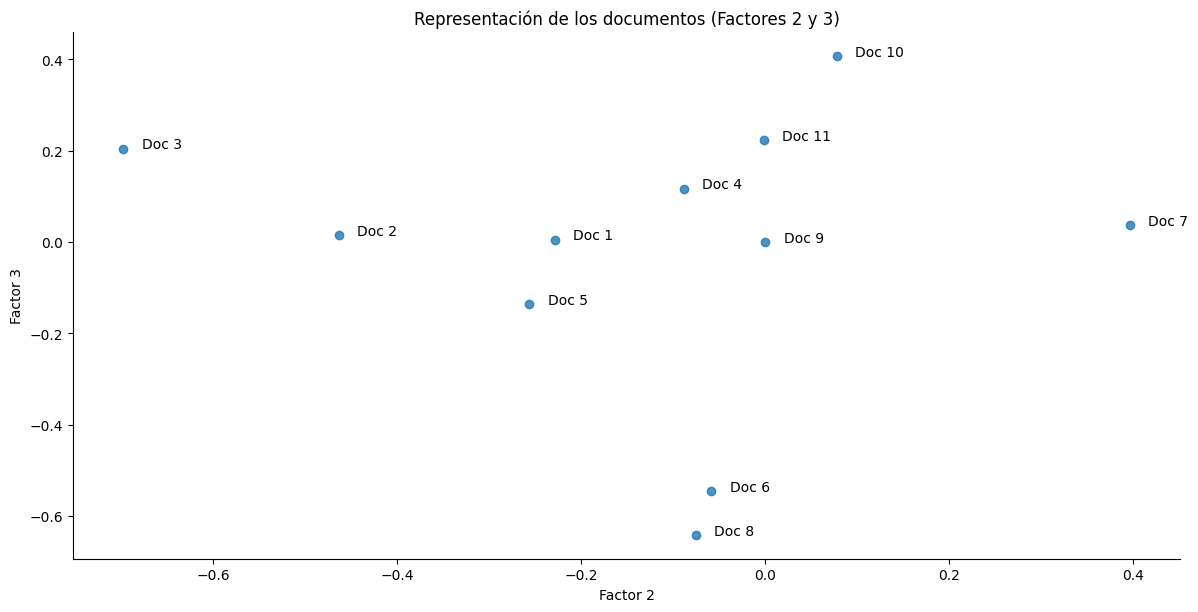

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({'f2': v_matrix1[:,2], 'f3': v_matrix1[:,1],
                   'group': ['Doc {}'.format(i+1) for i,doc in enumerate(documents)]})

new_var = sns.lmplot(x='f2', y='f3', data=df, fit_reg=False, height=6, aspect=2)

new_var

plt.title('Representación de los documentos (Factores 2 y 3)')
plt.xlabel('Factor 2')
plt.ylabel('Factor 3')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df.f2, df.f3, df.group, plt.gca())

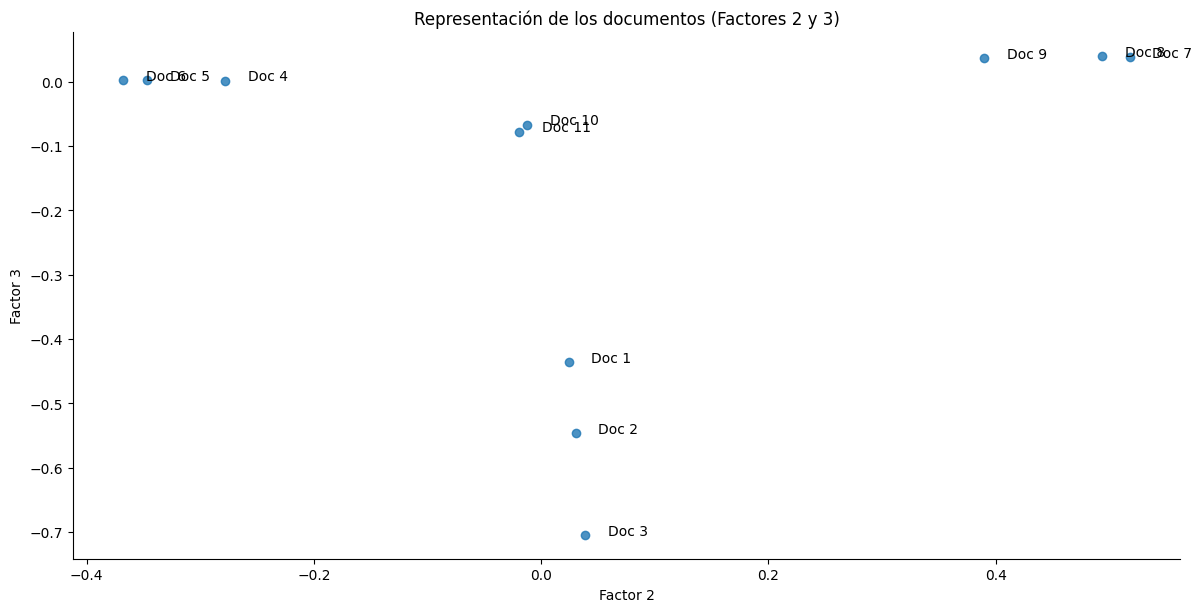

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({'f2': v_matrix[:,2], 'f3': v_matrix[:,1],
                   'group': ['Doc {}'.format(i+1) for i,doc in enumerate(documents)]})

new_var = sns.lmplot(x='f2', y='f3', data=df, fit_reg=False, height=6, aspect=2)

new_var

plt.title('Representación de los documentos (Factores 2 y 3)')
plt.xlabel('Factor 2')
plt.ylabel('Factor 3')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df.f2, df.f3, df.group, plt.gca())

### Representación visual de las Palabras en 2D

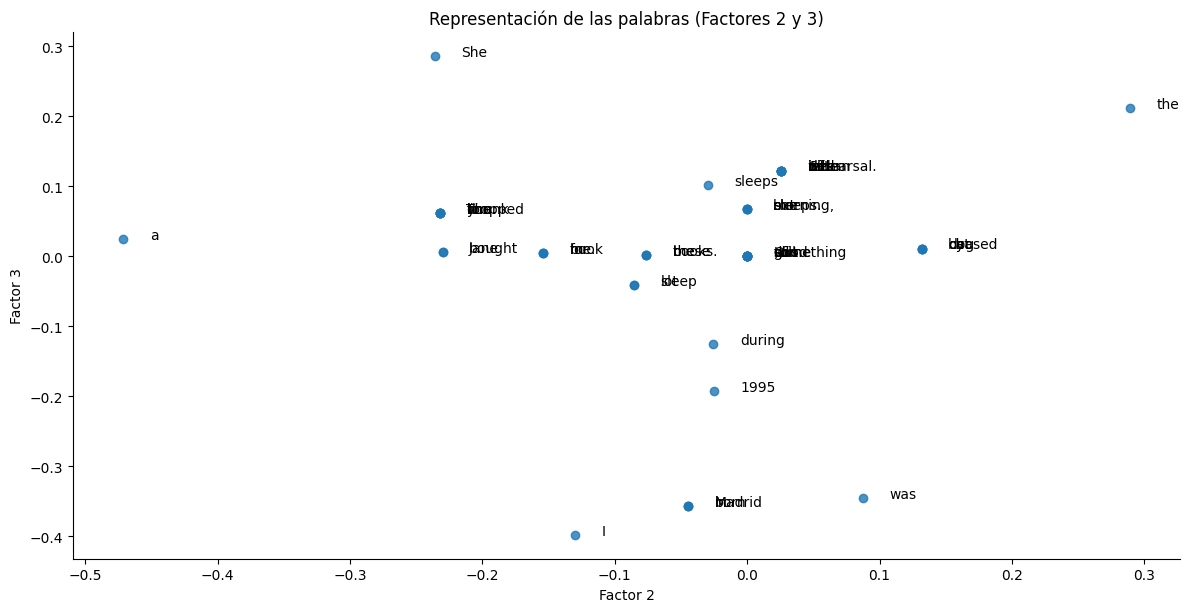

In [33]:
df = pd.DataFrame({'f2': u_matrix1[:,2], 'f3': u_matrix1[:,1],
                   'group': [word for word in dictionary.token2id.keys()]})

sns.lmplot(x='f2', y='f3', data=df, fit_reg=False, height=6, aspect=2)

plt.title('Representación de las palabras (Factores 2 y 3)')
plt.xlabel('Factor 2')
plt.ylabel('Factor 3')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df.f2, df.f3, df.group, plt.gca())

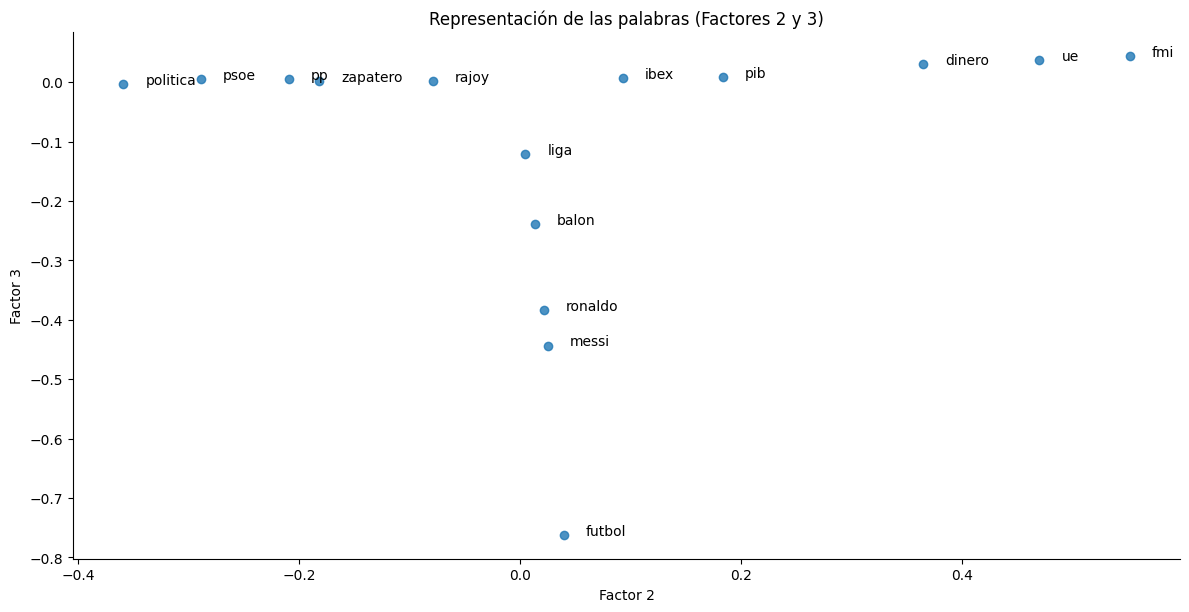

In [13]:
df = pd.DataFrame({'f2': u_matrix[:,2], 'f3': u_matrix[:,1],
                   'group': [word for word in dictionary.token2id.keys()]})

sns.lmplot(x='f2', y='f3', data=df, fit_reg=False, height=6, aspect=2)

plt.title('Representación de las palabras (Factores 2 y 3)')
plt.xlabel('Factor 2')
plt.ylabel('Factor 3')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df.f2, df.f3, df.group, plt.gca())

<hr>


## Topics & Terms


* Cada uno de los temas (***Topics***) esta definido por una importancia (o peso) que tienen las palabras (***Terms***) del corpus en el tema.


* Por eso cada tema tiene unas palabras relevantes que en función de si aparecen o no esas palabra en el documentos hacen que este pertenezca más a un tema que a otro.


* Gensim nos devuelve un "formula" por tema (Topic) que aplicada a las apariciones de las palabras en los documentos nos indica el grado de pertenencia del nuevo documento a ese tema. El que mayor valor tenga tras aplicar la fórmula del tema al documento significará que tiene mayor propensión a pertenecer a ese tema.

In [34]:
lsi_model1.print_topics()

[(0,
  '0.537*"the" + 0.352*"She" + 0.305*"was" + 0.224*"during" + 0.189*"I" + 0.167*"sleeps" + 0.165*"in" + 0.165*"Madrid" + 0.165*"born" + 0.140*"by"'),
 (1,
  '-0.398*"I" + -0.357*"in" + -0.357*"born" + -0.357*"Madrid" + -0.346*"was" + 0.286*"She" + 0.211*"the" + -0.193*"1995" + -0.126*"during" + 0.122*"rehearsal."'),
 (2,
  '-0.471*"a" + 0.289*"the" + -0.236*"She" + -0.232*"Thank" + -0.232*"to" + -0.232*"him." + -0.232*"dropped" + -0.232*"line" + -0.232*"you." + -0.230*"bought"')]

In [14]:
lsi_model.print_topics()

[(0,
  '0.451*"politica" + 0.423*"psoe" + 0.377*"zapatero" + 0.346*"pp" + 0.346*"fmi" + 0.293*"ue" + 0.268*"rajoy" + 0.255*"dinero" + 0.100*"pib" + 0.046*"ibex"'),
 (1,
  '-0.762*"futbol" + -0.443*"messi" + -0.383*"ronaldo" + -0.238*"balon" + -0.121*"liga" + 0.044*"fmi" + 0.037*"ue" + 0.031*"dinero" + 0.008*"pib" + 0.007*"ibex"'),
 (2,
  '0.552*"fmi" + 0.470*"ue" + 0.365*"dinero" + -0.359*"politica" + -0.289*"psoe" + -0.209*"pp" + 0.183*"pib" + -0.182*"zapatero" + 0.093*"ibex" + -0.079*"rajoy"')]

<hr>


# Topics de nuevos documentos


* Al tratarse el Topic Modeling de un aprendizaje no supervisado (básicamente es un clustering de documentos), tenemos que ser capaces de poder asignar a un nuevo documento el tema al que pertenece.


* Para ello tenemos que:
    1. ***Obtener los factores latentes del nuevo documento*** en función del vector de apariciones de palabras
    2. Calcular la ***similaridad con el resto de documentos*** en función de sus factores latentes
    
    
* Para obtener los factores latentes de un nuevo documento lo podemos hacer con la técnica del "***Folding-In***" que básicamente consiste en el siguiente cálculo teniendo las matrices U<sub>k</sub> y S:


$$ Factores Latentes_{new doc} = Vector Palabras_{new doc} \cdot U_{k} \cdot S^{-1}$$


* Gensim ya tiene implementada esta funcionalidad y también la del cálculo de similaridades entre documentos:

In [15]:
new_doc = "futbol futbol messi zapatero"
new_vec = dictionary.doc2bow(new_doc.split())

In [16]:
# Obtenemos los factores latentes del nuevo documento
vec_lsi = lsi_model[new_vec]

pd.DataFrame(vec_lsi, index=['Topic 1', 'Topic 2', 'Topic 3'], columns=['', 'Valor']).head()

,,Valor
Topic 1,0,0.456133
Topic 2,1,-1.965546
Topic 3,2,-0.077653


* Ahora pasamos a calcular las similaridades entre documentos y podemos observar como este nuevo documento tiene mayor similaridad con los documentos 1, 2 y 3 que hablan sobre fútbol.

In [36]:
from gensim import similarities

# Calculamos las similaridades
index = similarities.MatrixSimilarity(lsi_model1[corpus1])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])

pd.DataFrame(sims, columns=['Documento (indice)', 'Similaridad']).head(11)

,Documento (indice),Similaridad
0,5,0.962409
1,7,0.947463
2,4,0.573214
3,6,0.120591
4,1,0.026752
5,0,0.025607
6,8,0.000000
7,10,-0.162966
8,2,-0.173149
9,3,-0.358110


In [17]:
from gensim import similarities

# Calculamos las similaridades
index = similarities.MatrixSimilarity(lsi_model[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])

pd.DataFrame(sims, columns=['Documento (indice)', 'Similaridad']).head(11)

,Documento (indice),Similaridad
0,2,0.978027
1,1,0.977872
2,0,0.977710
3,9,0.905462
4,10,0.897511
5,3,0.210638
6,4,0.206452
7,5,0.206373
8,8,0.075325
9,7,0.045581


<hr>


# Bonus Track - LSI, Cálculo Analítico


* Dada una matriz que representa una Bolsa de Palabras donde:
    - Las filas representan a los documentos ('n' documentos)
    - Las columnas representan a las palabras ('m' palabras)
    
    
* Podemos descomponer esa matriz en tres matrices ***U***, ***S*** y ***V***, cuyo producto matricial es la matriz original ***A***.

$$\begin{bmatrix}
 &  &  &  &  &  & \\
 &  &  &  &  &  & \\
 &  &  & A &  &  & \\
 &  &  & _{nxm} &  &  & \\
 &  &  &  &  &  &
\end{bmatrix} =  \begin{bmatrix}
 &  &  &  & \\
 &  &  &  & \\
 &  & U &  & \\
 &  & _{nxn} &  & \\
 &  &  &  &
\end{bmatrix} \cdot \begin{bmatrix}
 &  &  &  &  &  & \\
 &  &  &  &  &  & \\
 &  &  & S &  &  & \\
 &  &  & _{nxm} &  &  & \\
 &  &  &  &  &  &
\end{bmatrix} \cdot \begin{bmatrix}
 &  &  &  &  &  & \\
 &  &  &  &  &  & \\
 &  &  & V^{t} &  &  & \\
 &  &  & _{mxm} &  &  & \\
 &  &  &  &  &  & \\
 &  &  &  &  &  & \\
 &  &  &  &  &  &
\end{bmatrix} $$


* Cada una de estas matrices va a contener la siguiente información:

    * ***Matriz U***: Contiene los valores de los ***factores latentes de las palabras***.
    * ***Matriz V***: Contiene los valores de los ***factores latentes de los documentos***.
    * ***Matriz S***: Matriz en cuya diagonal estan los llamados ***Valores singulares*** que tienen que ser valores decrecientes y no negativos. Los valores de la diagonal representan la importancia que tienen cada uno de los factores latentes de las palabras y de los documentos.

<hr>


# Cálculo Analítico: de las matrices U, S y V

### Cálculo de la matriz U

1. Se multiplica la matriz ***A*** por su traspuesta (***A·A <sup>T</sup>***) para obtener una matriz cuadrada de dimensión ***nxn***


2. Se calculan los autovalores de la matriz cuadrada (***A<sub>1</sub> = A·A <sup>T</sup>***) a partir de su polinómio característico:

$$det(A_{1}-\lambda I) = 0$$


3. Se calculan los autovectores asociados a cada autovalor (en orden decreciente por autovalor)


### Cálculo de la matriz S


1. Obtenidos los autovalores tras el cálculo de la matriz ***A***, se pone en la diagonal de la matriz ***S*** la raiz cuadrada del los autovalores en orden decreciente. El resto de elementos de la matriz ***S*** tendrán valor ***0***


### Cálculo de la matriz V

1. Se multiplica ***A <sup>T</sup>·A*** para obtener una matriz cuadrada de dimensión ***mxm***


2. Se calculan los autovectores asociados a cada autovalor (ya calculados) en orden descendente.

$$det(A_{2}-\lambda I) = 0$$

<hr>

## Ejemplo:


* Supongamos que tenemos la siguiente matriz:

$$\begin{bmatrix}
1 & 0 & 1\\
2 & 3 & 0
\end{bmatrix}$$

### Cálculo de la matriz U:

1. Calculamos ***A<sub>1</sub> = A·A <sup>T</sup>*** para obtener una matriz cuadrada de dimensión ***nxn***

$$A_{1} = A \cdot A' = \begin{bmatrix}
1 & 0 &1 \\
2 & 3 & 0
\end{bmatrix} \cdot \begin{bmatrix}
1&2 \\
0 & 3\\
1 & 0
\end{bmatrix} = \begin{bmatrix}
2 & 2\\
2 & 13
\end{bmatrix}$$

2. Cálculo de los autovalores de la matriz cuadrada (***A<sub>1</sub> = A·A <sup>T</sup>***) a partir de su polinómio característico:
<br><br><br>
$$det(A_{1}-\lambda I) = \begin{bmatrix}
2 - \lambda & 2\\
2 & 13 - \lambda
\end{bmatrix} = (2  - \lambda) \cdot (13 - \lambda) - 4 =  \lambda^{2} - 15 \lambda + 22$$

<br>

$$ \lambda = \frac{15\pm \sqrt{15^2 - 4 \cdot 1 \cdot 22}}{2\cdot1} $$
<br>
$$\lambda_{1} = 13,35 $$
<br>
$$\lambda_{2} = 1,65 $$


3. Se calculan los autovectores asociados a cada autovalor (en orden decreciente por autovalor)

  * Autovalor 1 = 13,35


$$\begin{bmatrix}
2 & 2\\
2 & 13
\end{bmatrix} \cdot \begin{bmatrix}
x\\y
\end{bmatrix} = 13,35 \cdot \begin{bmatrix}
x\\y
\end{bmatrix}$$

<br>

$$ \begin{matrix}
2x + 2y = 13,35x
\\
2x + 13y = 13,35y
\end{matrix} $$

<br>

$$ -11,35x + 2y = 0; \: si \:  x = 1; \:  y = \frac{11,35}{2} = 5,675$$

<br>

$$Normalizo \: \rightarrow \sqrt{1^2  + 5,675^2} = 5,848$$

<br>

$$Autovector (1) \: = \left [ \frac{1}{5,848} \:\: \frac{5,675}{5,848} \right ] = \left [ 0,17 \:\:\: 0,98\right ]$$

   * Para el autovalor 2 realizo los mismos pasos y obtengo el siguiente resultado:
   
$$\begin{bmatrix}
2 & 2\\
2 & 13
\end{bmatrix} \cdot \begin{bmatrix}
x\\y
\end{bmatrix} = 1,65 \cdot \begin{bmatrix}
x\\y
\end{bmatrix}$$

<br>

$$Autovector (2) \: = \left [ 0,98 \:\:\: -0,17 \right ]$$


<br>

* Por tanto la matriz U quedaría:

$$U = \begin{bmatrix}
0,17 & 0,98\\
0,98 & -0,17
\end{bmatrix}$$

### Cálculo de la matriz S


1. Como ya se tienen calculados los autovalores obtenidos tras el cálculo de la matriz ***U***, nos es facil obtener la matriz ***S*** que tendrá en la diagonal la raiz cuadrada de los autovales colocados de manera decreciente:


$$ S = \begin{bmatrix}
\sqrt{13,35} & 0 & 0 \\
0 & \sqrt{1,65} & 0
\end{bmatrix} = \begin{bmatrix}
3,65 & 0 & 0 \\
0 & 1,28 & 0
\end{bmatrix} $$


### Cálculo de la matriz V

1. Se multiplica ***A <sup>T</sup>·A*** para obtener una matriz cuadrada de dimensión ***mxm***

$$A_{2} = A' \cdot A = \begin{bmatrix}
1&2 \\
0 & 3\\
1 & 0
\end{bmatrix} \cdot \begin{bmatrix}
1 & 0 &1 \\
2 & 3 & 0
\end{bmatrix} = \begin{bmatrix}
5 & 6 & 1 \\
6 & 9 & 0 \\
1 & 0 & 1
\end{bmatrix}$$

2. Se calculan los autovectores asociados a cada autovalor (ya calculados) en orden descendente.

    - Autovalores:
<br>
$$\lambda_{1} = 13,35 $$
<br>
$$\lambda_{2} = 1,65 $$

* Calculamos los autovectores a partir de su polinomio característico (para estos cálculos no mostramos el procedimiento):

$$\begin{bmatrix}
5 & 6 & 1 \\
6 & 9 & 0 \\
1 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix}
x\\y\\z
\end{bmatrix} = 13,35 \cdot \begin{bmatrix}
x\\y\\z
\end{bmatrix}$$

<br>

$$Autovector (1) \: = \left [ 0,58 \:\:\: 0,49 \:\: -0,64\right ]$$

<br>

$$\begin{bmatrix}
5 & 6 & 1 \\
6 & 9 & 0 \\
1 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix}
x\\y\\z
\end{bmatrix} = 1,65 \cdot \begin{bmatrix}
x\\y\\z
\end{bmatrix}$$

<br>

$$Autovector (2) \: = \left [ 0,81 \:\: -0,41 \:\: 0,43\right ]$$

<br>

$$\begin{bmatrix}
5 & 6 & 1 \\
6 & 9 & 0 \\
1 & 0 & 1
\end{bmatrix} \cdot \begin{bmatrix}
x\\y\\z
\end{bmatrix} = 0 \cdot \begin{bmatrix}
x\\y\\z
\end{bmatrix}$$

<br>

$$Autovector (3) \: = \left [ 0,05 \:\: 0,77 \:\: 0,64\right ]$$

* Por tanto la matriz V quedaría:

$$V = \begin{bmatrix}
0,58 & 0,49 & -0,64 \\
0,81 & -0,41 & 0,43 \\
0,05 & -0,77 & 0,64
\end{bmatrix}$$


## La Descomposición Matricial quedaría:

$$\begin{bmatrix}
1 & 0 &1 \\
2 & 3 & 0
\end{bmatrix} = \begin{bmatrix}
0,17 & 0,98\\
0,98 & -0,17
\end{bmatrix} \cdot \begin{bmatrix}
3,65 & 0 & 0 \\
0 & 1,28 & 0
\end{bmatrix} \cdot \begin{bmatrix}
0,58 & 0,81 & 0,05 \\
0,49 & -0,41 & 0,77 \\
-0,64 & 0,43 & 0,64
\end{bmatrix}$$